In [1]:
# -*- coding: utf-8 -*-
"""
Chain Vibrations Code
Section 2.3 of Physics by Computer - Kinzel and Reents
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, inv, eig
from matplotlib.animation import FuncAnimation, FFMpegFileWriter


print("\nChain Vibrations\n")

# Initialize system parameters and matrices
f = 1.0 # Spring Constant
m1 = 0.4
m2 = 1.0

F = lambda q: np.array([[2*f, -f, 0, -f*np.exp(-1j*q)],
                        [-f, 2*f, -f, 0],
                        [0, -f, 2*f, -f],
                        [-f*np.exp(1j*q), 0, -f, 2*f]])
M = np.diag([m1, m1, m1, m2])

# Set-up eigenvalue matrix
eig_mat = lambda q: inv(M).dot(F(q))


# Plot eigenvalues (normal mode frequencies) as a function of wavenumber
x_axis = np.arange(-np.pi, np.pi, np.pi/50)
eigenlist = [eigvals(eig_mat(x)) for x in x_axis]
eigenlist_2 = np.sqrt(np.abs(eigenlist))

# Figure 2.12: Frequencies of the four eigenmodes of the linear chain.
plt.figure(1)
plt.plot(x_axis, eigenlist_2, "k.")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
            r"$\pi$"])
plt.xlabel('q', size='xx-large')
plt.ylabel(r'$\omega$', size='xx-large')
plt.show()

# Print eigenvectors for q = 0
eigen_sys = eig(eig_mat(0.0))
omega = np.sqrt(np.abs(eigen_sys[0])) # Normal Mode Frequencies
eigen_vecs = np.abs(eigen_sys[1]) # Eigenvectors
print("\nEigenvectors for q = 0:", eigen_vecs)

# Start of anime code
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro', ms=20, animated=True)
t = np.linspace(0, 10, 1000) # Time of anime

# Plot line dividers 
plt.plot([-3,3], [0.5, 0.5], 'k')
plt.plot([-3,3], [1.5, 1.5], 'k')
plt.plot([-3,3], [2.5, 2.5], 'k')


def init():
    """
    Initial values of the plot and axis limits.
    """
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 3.5)
    ln.set_data([], [])
    return ln,
    
def update(frame):
    """
    Function called for every frame in the animation. Each s_# is a vector
    containing the displacement functions of the mass for a given frequency of
    oscillation. 
    Amplitude of oscillation came from eigenvectors.
    Frequency of oscillation came from the eigenvalues.
    """
    s1 = eigen_vecs[:,1]*np.sin(omega[0]*frame) + np.array([-1.8, -0.6, 0.6, 
                   1.8])
    s2 = eigen_vecs[:,3]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame), np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame + np.pi)]) + np.array([-1.8,-0.6,0.6,
                   1.8])
    s3 = eigen_vecs[:,2]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame), np.sin(omega[0]*frame + np.pi), 
                   np.sin(omega[0]*frame)]) + np.array([-1.8,-0.6,0.6,1.8])  
    s4 = eigen_vecs[:,0]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame + np.pi), np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame)]) + np.array([-1.8,-0.6,0.6,1.8])
    
    # Set positions of masses along the y-axis (four masses each position).
    y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
    
    ln.set_data(np.concatenate((s1, s2, s3, s4)), y)
    return ln,

anim = FuncAnimation(fig, update, frames=t, init_func=init, blit=True, 
                     interval=10, repeat=True)






Chain Vibrations



<Figure size 640x480 with 1 Axes>


Eigenvectors for q = 0: [[5.18871540e-01 5.00000000e-01 7.07106781e-01 2.86128473e-01]
 [6.62590637e-01 5.00000000e-01 5.33037657e-17 7.46886103e-01]
 [5.18871540e-01 5.00000000e-01 7.07106781e-01 2.86128473e-01]
 [1.50060978e-01 5.00000000e-01 4.39985806e-17 5.27657220e-01]]


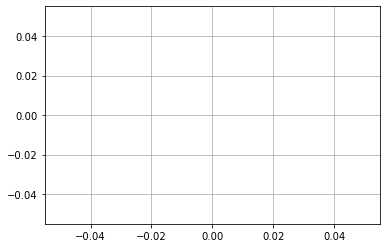

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
a = 0.7
r = 0.25
omegad = 2/3

def f(y,t):
    psi = y[0]
    omega = y[1]
    fpsi = omega
    fomega = -r*y[1]-np.sin(y[0])+a*np.cos(omegad*t)
    return np.array([fpsi,fomega], float)

t1 = 0
t2 = t1+3000*np.pi
h = 0.01

tpoints = np.arange(t1,t2,h)
psipoints = []
omegapoints = []

y = np.array([np.pi/2,0],float)
for t in tpoints:
    psipoints.append(y[0])
    omegapoints.append(y[1])
    k1 = h*f(y,t)
    k2 = h*f(y+0.5*k1,t+0.5*h)
    k3 = h*f(y+0.5*k2,t+0.5*h)
    k4 = h*f(y+k3,t+h)
    y += (k1+2*k2+2*k3+k4)/6
    
#plt.plot(psipoints,omegapoints)
#plt.xlim(-np.pi,np.pi)
#plt.ylim(-np.pi,np.pi)
#plt.show()

def data_gen(i=-1):
    cnt = 0
    while cnt < len(psipoints):
        cnt += 1
        i += 10
        if (-4 < psipoints[i] < 4): 
            yield psipoints[i], omegapoints[i]
        
def init():
    ax.set_ylim(-np.pi, np.pi)
    ax.set_xlim(-np.pi, np.pi)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=0,
                              repeat=False, init_func=init)
mywriter = animation.FFMpegWriter(fps=100)
plt.show(mywriter)
